<a href="https://colab.research.google.com/github/Dimisz/tensorflow_lectures/blob/main/Autoencoders_lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autoencoders** are sometimes called **semi-supervised** learning, because:

* sometimes during training of an autoencoder we may have access to correct labels

* but we cannot produce metrics such as accuracy or rmse

# Autoencoder Basics

Autoencoders are designed to reproduce the input, i.e. the number of input neurons is equal to the nummber of output neurons.

Very similar to PCA.

The hidden layer is NOT simply sub-selecting features.

It is calculating combinations of the original features **representing the original data in a reduced dimensional space**. 

Then, we expand it back out to the output layer.


## Two use cases (we will see)

* Dimensionality Reduction
* Noise Removal

## Dimensionality Reduction

Consists of:
1.   Encoder
2.   Decoder

Used for:
* Compressing data
* Visualizing data in lower dimensions
* Reveal hidden relationships not clearly seen in higher dimensions


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0,
                  random_state=101)

In [4]:
X,y = data

In [5]:
# add noise
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
z_noise

0      2.706850
1      0.628133
2      0.907969
3      0.503826
4      0.651118
         ...   
295    1.523750
296    1.290230
297   -1.478319
298    0.214234
299   -0.240510
Length: 300, dtype: float64

In [7]:
feat = pd.DataFrame(X)

In [8]:
feat = pd.concat([feat, z_noise], axis=1)
feat.columns = ['X1', 'X2', 'X3']

In [9]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


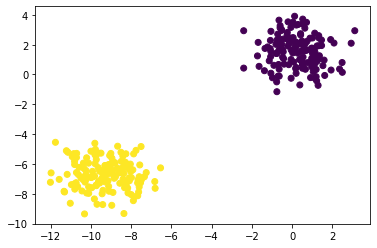

In [10]:
plt.scatter(feat['X1'], feat['X2'], c=y)

In [11]:
from mpl_toolkits.mplot3d import Axes3D

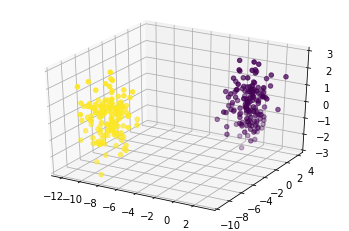

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'], feat['X2'],feat['X3'], c=y)

### Creating encoder and decoder

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [14]:
from tensorflow.keras.optimizers import SGD

In [15]:
# Starts with 3 inputs ----> reduces it to 2 ----> expands back to 3 neurons
encoder = Sequential()
encoder.add(Dense(units=2, activation="relu", input_shape=[3]))

In [16]:
decoder = Sequential()
decoder.add(Dense(units=3, activation="relu", input_shape=[2]))

In [17]:
autoencoder = Sequential([encoder, decoder])

In [18]:
autoencoder.compile(loss="mse",
                    optimizer=SGD(learning_rate=0.015))

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [21]:
autoencoder.fit(scaled_data, scaled_data, epochs=5)

Epoch 1/5
10/10 [==============================] - 3s 3ms/step - loss: 0.3350
Epoch 2/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 3/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 4/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 5/5
10/10 [==============================] - 0s 3ms/step - loss: 0.3350


In [22]:
encoded_2dim = encoder.predict(scaled_data)

In [23]:
encoded_2dim.shape, scaled_data.shape

((300, 2), (300, 3))

In [24]:
#encoded_2dim

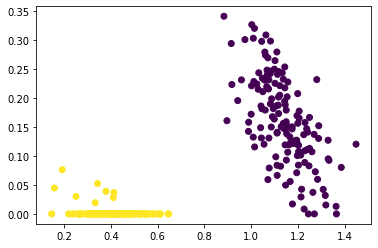

In [25]:
plt.scatter(encoded_2dim[:,0], encoded_2dim[:,1], c=y)

## Autoencoders on image data

### Read in Data

In [69]:
from tensorflow.keras.datasets import mnist

In [70]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

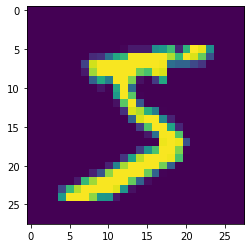

In [71]:
plt.imshow(X_train[0])

In [72]:
# scale
X_train = X_train / 255

In [73]:
X_test = X_test / 255

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

### Building Stacked Autoencoder

In [33]:
28*28

784

In [34]:
784/2

392.0

In [52]:
X_train[0].shape

(28, 28)

In [75]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

Going down from 784 to 25

In [76]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation="relu"))
decoder.add(Dense(100, activation="relu"))
decoder.add(Dense(200, activation="relu"))
decoder.add(Dense(400, activation="relu"))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [77]:
autoencoder = Sequential([encoder, decoder])

In [78]:
autoencoder.compile(loss="binary_crossentropy",
                    optimizer=SGD(learning_rate=1.5),
                    metrics=['accuracy'])

In [79]:
autoencoder.fit(X_train, X_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2547 - accuracy: 0.0816
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1907 - accuracy: 0.1553
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1701 - accuracy: 0.1869
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1554 - accuracy: 0.2057
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1452 - accuracy: 0.2181


In [80]:
passed_images = autoencoder.predict(X_test[:10])

Original image


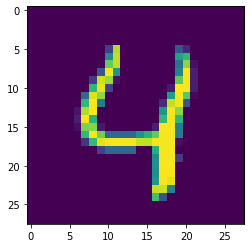

AAttempted reconstruction


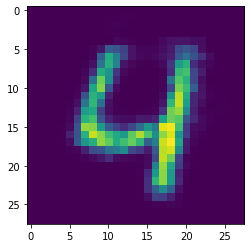

In [84]:
n = 4
print("Original image")
plt.imshow(X_test[n])
plt.show()
print("AAttempted reconstruction")
plt.imshow(passed_images[n])

### Using Autoencoders to denoise

In [85]:
from tensorflow.keras.layers import GaussianNoise

In [86]:
sample = GaussianNoise(0.2)

In [87]:
noisy = sample(X_test[:10], training=True)

Original


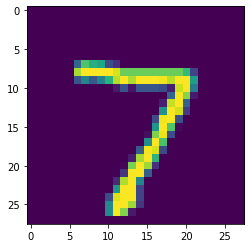

NOISY


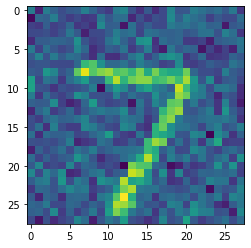

In [88]:
n = 0
print("Original")
plt.imshow(X_test[n])
plt.show()
print("NOISY")
plt.imshow(noisy[n])
plt.show()

In [89]:
import tensorflow as tf

In [90]:
tf.random.set_seed(101)

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

encoder.add(GaussianNoise(0.2))

encoder.add(Dense(400,activation="relu"))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [91]:
decoder = Sequential()
decoder.add(Dense(50, input_shape=[25], activation="relu"))
decoder.add(Dense(100, activation="relu"))
decoder.add(Dense(200, activation="relu"))
decoder.add(Dense(400, activation="relu"))
decoder.add(Dense(784, activation="sigmoid"))
decoder.add(Reshape([28,28]))

In [92]:
noise_remover = Sequential([encoder, decoder])

In [93]:
noise_remover.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])

In [94]:
noise_remover.fit(X_train, X_train, epochs=8)

Epoch 1/8
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1714 - accuracy: 0.1797
Epoch 2/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1313 - accuracy: 0.2310
Epoch 3/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1216 - accuracy: 0.2440
Epoch 4/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1158 - accuracy: 0.2540
Epoch 5/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1117 - accuracy: 0.2605
Epoch 6/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1088 - accuracy: 0.2656
Epoch 7/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1067 - accuracy: 0.2691
Epoch 8/8
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1052 - accuracy: 0.2726


In [95]:
ten_noisy_images = sample(X_test[:10], training=True)

In [96]:
denoised = noise_remover(ten_noisy_images)

ORIGINAL IMAGE


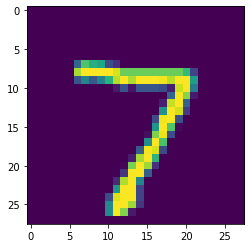

NOISE ADDED IMAGE


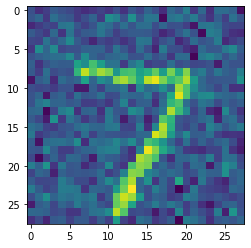

NOISE REMOVED


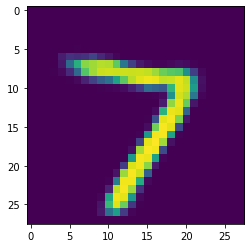

In [97]:
n=0
print("ORIGINAL IMAGE")
plt.imshow(X_test[n])
plt.show()
print("NOISE ADDED IMAGE")
plt.imshow(ten_noisy_images[n])
plt.show()
print("NOISE REMOVED")
plt.imshow(denoised[n])
plt.show()